**Data Challenge 6: Ashley Anderson**
<br>**GitHub Link: https://github.com/ashleymaree/DC_6.git**

In [3]:
# code to show/hide python code in a report
from IPython.display import HTML
HTML('''
<script src='//code.jquery.com/jquery-3.3.1.min.js'></script>
<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
$('div .jp-CodeCell .jp-Cell-inputWrapper').hide();
} else {
$('div.input').show();
$('div .jp-CodeCell .jp-Cell-inputWrapper').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Code on/off"></form>''')

In [157]:
## load in required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

**<u>Abstract</u>**
<br> Unsupervised learning is an important concept to glean insights from large, somewhat ambiguous, datasets. AirBnB data from Cape Town, South Africa was extracted and used for Principal Component Analysis (PCA) and hierarchial clustering to better understand potential subgroups within the data. Three wards were selected for analysis. After completion of PCA and hierarchial clustering it was concluded the data could not be easily grouped according to ward without the "ward" assignment. This analysis could be performed again selecting different features or reducing the dataset in a different way.

**<u>Introduction</u>**
<br> The data of interest in this analysis is AirBnB data from Cape Town, South Africa. The original dataset lists AirBnB's in Cape Town and provides data on each AirBnB listing such as price, number of reviews, neighbourhood, and so on. A total of 18,723 records are included in this dataset. Unsupervised learning techniques such as PCA and hierarchial clustering can provide potential subgroupings of the data as supported by statistical methods. 

**<u>Methods</u>**
<br> In order to perform unsupervised learning on the dataset, the data was first filtered down to look at the 3 wards in Cape Town containing the most AirBnB listings. The following features were selected for this analysis: (1) number of days the AirBnB is available each year (2) total number of reviews (3) number of listings each host has (4) total number of bedrooms (5) minimum night stay required by the AirBnB host (6) number of beds each listing contains and (7) the neighborhood ward. Feature selection was conducted based on which feature may change from neighborhood to neighboorhood. For example, an AirBnB in a more suburban area may be more likely to have more beds than a rural area. Additionally, AirBnBs in rural areas may require a longer minimum night stay as they might not be as popular as a more suburban area for visitors. These features were also selected as the data type was optimal for performing unsupervised learning on. First, PCA was used to reduce the dimensionality of the dataset. Then, kmeans clustering with 3 clusters (the 3 wards of interest) was performed. 

**<u>Results</u>**
<br> As a result of the PCA, the data could be represented by 6 of the 7 principal components as seen in Figure 1. This is a high number of principal components (PCs) to move forward with, and did not reduce the data by much. Because PC 1 and PC 2 only represent ~50% of the variance, Figure 2 may or may not contribute to the strength of each PC. PC 2 has slightly less variance and may be a better representation. Next, kmeans clustering was performed. 3 clusters were selected as the data was thought to be separated into 3 wards. As shown in Figure 3, the data did not group well by the 3 clusters. Because the kmeans analysis was not successful, hierarchial clustering was also performed. Figure 4 shows the hierarchial clustering represented by a dendrogram. 

<ipython-input-194-dd25b6d7092d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cape_wards['neighbourhood_cleansed'] = cape_wards['neighbourhood_cleansed'].map(lambda x: x.lstrip('Ward ')) ## remove "Ward" from neighbourhood_cleansed


Text(0.5, 1.0, 'Principal Components by Cummulative Explained Variance')

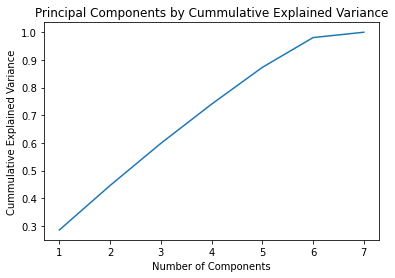

In [194]:
capetown = pd.read_csv('listings.csv') ## read in data
capetown.groupby('neighbourhood_cleansed').count().sort_values('id', ascending=False) ## select three wards with most listings: Ward 115, 54, and 77
cape_wards = capetown[(capetown['neighbourhood_cleansed'] == "Ward 115") | (capetown['neighbourhood_cleansed'] == "Ward 54") | (capetown['neighbourhood_cleansed'] == "Ward 77")] ## filter data to only select top 3 wards
cape_wards['neighbourhood_cleansed'] = cape_wards['neighbourhood_cleansed'].map(lambda x: x.lstrip('Ward ')) ## remove "Ward" from neighbourhood_cleansed

cape_filter = cape_wards.filter(items=['availability_365', 
                                         'number_of_reviews', 
                                         'host_listings_count', 
                                         'bedrooms', 
                                       'minimum_nights', 
                                       'beds', 'neighbourhood_cleansed']).dropna() ## filter for features of interest and drop NAs

scaler = StandardScaler() ## initialize scaler to be standard scaler
scaler.fit(cape_filter) ## calculates means and standard deviations of columns
data_scaled = scaler.transform(cape_filter) ## subtracts off mean and divides by SD in order to scale data
pca = PCA() ## initialize PCA
pca.fit(data_scaled) ## fit the PCA model with the scaled data
pca_vector = pca.explained_variance_ratio_ ## figuring out how many components we need
components = np.arange(1,8) ## add x-axis for 6 PCs
plt.plot(components, np.cumsum(pca_vector)) ## in
plt.xlabel('Number of Components') ## add x-axis label
plt.ylabel('Cummulative Explained Variance') ## add y-axis label
plt.title('Principal Components by Cummulative Explained Variance') ## add title

**Figure 1:** This figure shows the number of principal components in the data plotted against the cumulative variance of the principal components. We can see a slight elbow (change in the direction of the line) at PC 6, and can therefore perform dimension reduction using 6 PCs instead of 7.

(-6.0, 6.0)

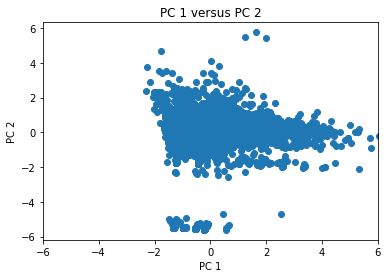

In [193]:
pca = PCA(n_components=6) ## initialize PCA and select number of principal components of interest (6)
pca.fit(data_scaled) ## fit the PCA model with the scaled data
pca_scores = pca.fit_transform(data_scaled)
plt.scatter(pca_scores[:,0], pca_scores[:, 1]) ## graph PC 1 versus PC 2
plt.xlabel('PC 1') ## add x-axis label
plt.ylabel('PC 2') ## add y-axis label
plt.title('PC 1 versus PC 2') ## add title
plt.xlim(-6, 6) ## scale x-axis for better visualization

**Figure 2:** Principal component 1 and principal component 2 are plotted here. PC 1 is more spread out and appears to have more variability than PC 2. PC 2 could potentially be a better indicator of the data.

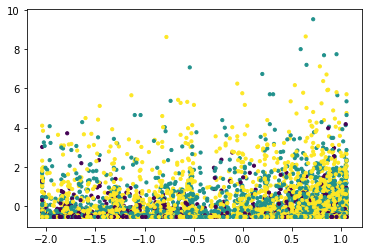

In [190]:
kmeans = KMeans(n_clusters = 3) ## specify number of clusters
kmeans.fit(data_scaled) ## fit the kmeans algorithm to the scaled data
y_means = kmeans.predict(data_scaled) ## assign cluster assignments for each data point
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=y_means, s=10) ## plot k-means 

**Figure 3:** Visualization of kmeans analysis. Data does not appear to be in 3 clusters. 

Text(0.5, 1.0, 'Hierarchial Clustering with Complete Linkage')

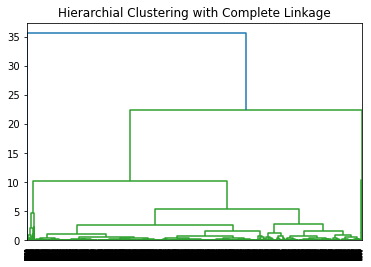

In [195]:
PC_short = pd.DataFrame(pca_scores[:, 0:1])
shc.dendrogram(shc.linkage(PC_short, ## initate dedrogram plot with data
                                    method = 'complete', ## plot using 'complete' linkage
                                    metric = 'Euclidean')) ## plot using 'Euclidean' distance
plt.title('Hierarchial Clustering with Complete Linkage') ## add plot title

**Figure 4:** Hierarchial Clustering of PC 1 and 2 using complete linkage. Approximately 4 clusters could be gleaned from this figure at a cutoff of a linkage at 15. 

**<u>Discussion</u>**
<br> The dimension reduction analysis by PCA was not as successful as planned due to the proposed high number of PCs. This could potentially tell us the features are too different from each other to provide any meaningful learning. The kmeans clustering was also limited by the size of the dataset. Coloring the figure by the y means did not provide any potential clusters. Hierarchial clustering should be further explored as it produced 4 potential clusters. Future analysis could be performed on a further subsetted dataset.

**<u>Conclusion</u>**
<br> In summary, the dataset was most likely too large for this analysis and should be subset further. The PCA, kmeans clustering and heirarchial clustering were challenging to perform given the size of the dataset. Of the unsupervised learning methods performed, the hierarchial clustering produced a number of clusters close to the true number of clusters (3 wards). 